## Анализ расхода топлива автомобиля при помощи линейной регрессии.
### Выполнил: Земнухов Вадим

# Содержание
[**Визуальный анализ**](#id_1)

[**Регрессия**](#id_2)

[**Анализ остатков**](#id_3)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

In [19]:
import warnings
import scipy.stats as sps

В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. 

1. mpg — расход топлива (миль/галлон);
2. cylinders — количество цилиндров мотора;
3. displacement — объем мотора (куб. дюйм);
4. horsepower — мощность мотора (в лошадиных силах);
5. weight — вес (тысяч фунтов);
6. acceleration — время, за которое автомобиль разгоняется до 60 mph; 
7. year — год автомобиля (по модулю 100);
8. origin — место производства (1 — Америка, 2 — Европа, 3 — Япония); 
9. name — название автомобиля.

In [20]:
df = pd.read_csv('auto.csv')

df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


<div id= 'id_1'/>

## Визуальный анализ

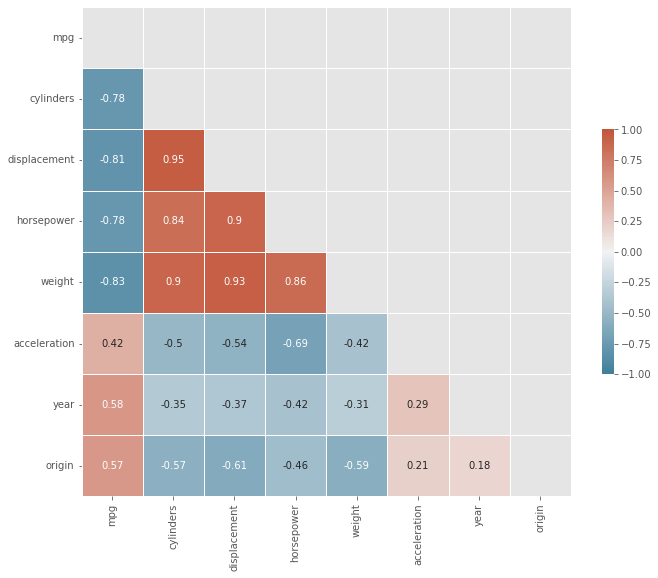

In [21]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, 
            center=0, vmin=-1, vmax=1,
           )
plt.show()

Как можно заметить по значениям коэффициентов корреляции между признаками также может присутствовать линейная зависимость, что в целом не удивительно. Когда инженеры проектируют автомобили, то те или иные параметры или технические решения выбираются не просто так, а с учетом необходимых характеристик на выходе, а также с учетом уже принятых решений относительно конструкции тех или иных узлов. Например, предположим, что инженер принял решение, что для разрабываемой модели автомобиля нужно использовать конкретную модель двигателя. Выбрав модель двигателя мы уже имеем значения его объема, а также информацию по количеству оборотов в минуту и значениям крутящего момента. Исходя из этого, инженер уже не может выбрать любой бензонасос, инжектор или карбюратор, т.к. выбрав двигатель, мы уже получили определнные ограничения на последующий выбор других элементов.

В связи с этим, не стоит удивляться тому, что характеристики автомобиля, могут коррелировать между собой. Так и должно быть. Мы также знаем, что для получения хорошей модели линейной регрессии нам необходимо, чтобы признаки были линейно независимы между собой. В нашем случае нам нужно оценить расход топлива в зависимости от характеристик автомобиля. Чтобы однозначно ответить какие признаки можно исключить, попробуем для начала построить модель по имеющимся и проанализировать качество нашей модели. Если оно будет неудовлетворительным, то исходя из ситуации будем принимать решение о том, какие признаки стоит исключить (например, проверив значения весов регрессии и ещё раз проанализировав корреляционную матрицу).

Однако, в нашем случае всё-таки присутствуют признаки, которые всё-таки могут "сбивать с толку" нашу модель. Например год выпуска. Да, конечно, в разные периоды времени конструкции автомобилей менялись, но у разных производителей они менялись по-разному. В случае, если бы мы анализировали расход топлива для одного бренда, то признак "Year" можно было бы оставить. В нашем же случае мы анализируем автомобили разных брендов, поэтому "Year" лучше исключить.

Признак "Origin" (страна выпуска), как правило, влияет на качество выпускаемой продукции, и как следствие на расход топлива в нашем случае. Однако, мы имеем дело с разными брендами автомобилей, а как известно в разных крупных компаниях абсолютно разная корпоративная культура и разные бизнес модели. Некоторые компании стараются выпускать продукцию одинакового качества вне зависимости от страны производства, а некоторые наоборот (хоть это и не очень честно, и открыто об этом никто не заявляет). Исходя из этого на мой взгляд признак "Origin" также следует исключить. Оставить его можно было бы в случае, если бы у нас была выборка по одному бренду автомобилей.

Также признак "Name" в нашем случае не несет никакой полезной информации для модели.

In [22]:
df = df.drop(['year', 'origin', 'name'], axis = 1)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
5,15.0,8,429.0,198,4341,10.0
6,14.0,8,454.0,220,4354,9.0
7,14.0,8,440.0,215,4312,8.5
8,14.0,8,455.0,225,4425,10.0
9,15.0,8,390.0,190,3850,8.5


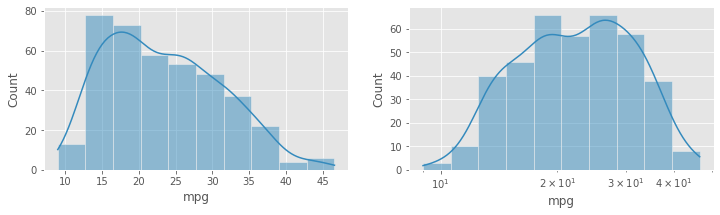

In [23]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.histplot(df['mpg'], bins=10, kde=True)
plt.subplot(122)
sns.histplot(df['mpg'], bins=10, log_scale=True, kde=True);


В случае с логарифмированием мы можем наблюдать меньшую ассиметричность гистограммы. Предположим, что нашу целевую переменную необходимо логарифировать. Посмотрим, как обстоят дела с признаками.

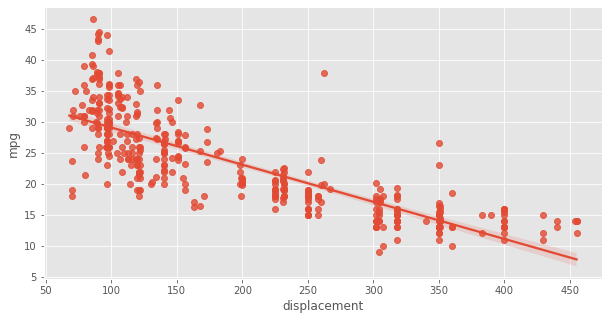

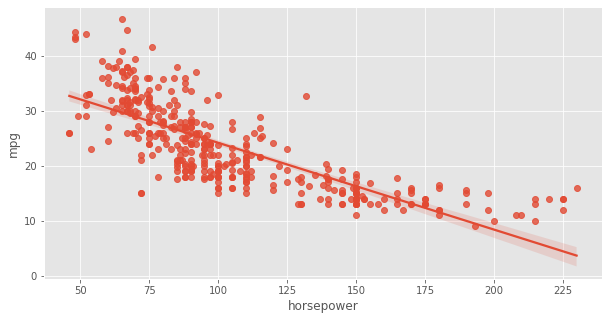

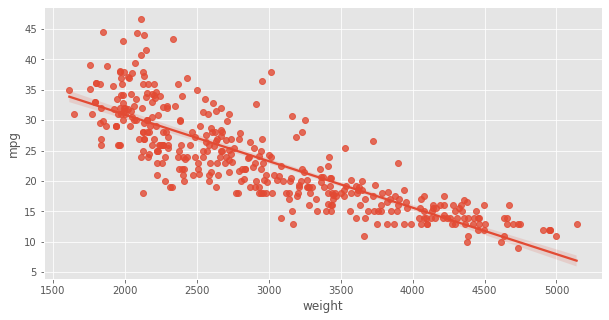

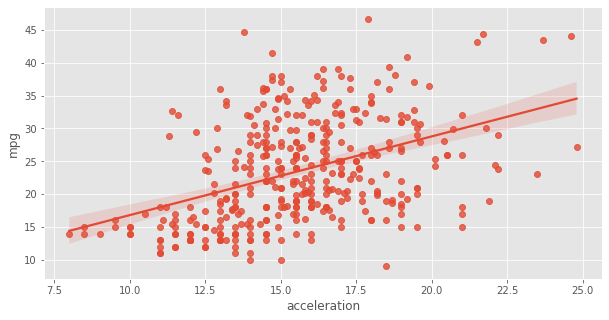

In [24]:
for x in ['displacement','horsepower','weight','acceleration']:
    sns.regplot(data=df, x=x, y='mpg',  
               )
    plt.show()

По диаграмме рассеяния видно, что прямая довольно плохо апроксимирует зависимость mpg от какого либо-признаками. Видно, что зависимость для всех признаков, кроме acceleration больше похожа на экспоненту. В случае с acceleration зависимость неочевидная, и довольно большой разброс. Связано это может быть, что признак acceleration меньше всего коррелирует с целевой переменной по сравнению с остальными признаками. Зависимость mpg от acceleration может быть как линейной, так и нет.

Попробуем прологарифмировать все признаки и целевую переменную, и посмотрим, как измениться картина. Признак cylinders логаримфировать не будем, т.к. его значения дискретны.

In [25]:
df['mpg'] = np.log(df['mpg'])
df['displacement'] = np.log(df['displacement'])
df['horsepower'] = np.log(df['horsepower'])
df['weight'] = np.log(df['weight'])
df['acceleration'] = np.log(df['acceleration'])

In [26]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,2.890372,8,5.726848,4.867534,8.161660,2.484907
1,2.708050,8,5.857933,5.105945,8.214194,2.442347
2,2.890372,8,5.762051,5.010635,8.142063,2.397895
3,2.772589,8,5.717028,5.010635,8.141190,2.484907
4,2.833213,8,5.710427,4.941642,8.145840,2.351375
5,2.708050,8,6.061457,5.288267,8.375860,2.302585
6,2.639057,8,6.118097,5.393628,8.378850,2.197225
7,2.639057,8,6.086775,5.370638,8.369157,2.140066
8,2.639057,8,6.120297,5.416100,8.395026,2.302585
9,2.708050,8,5.966147,5.247024,8.255828,2.140066


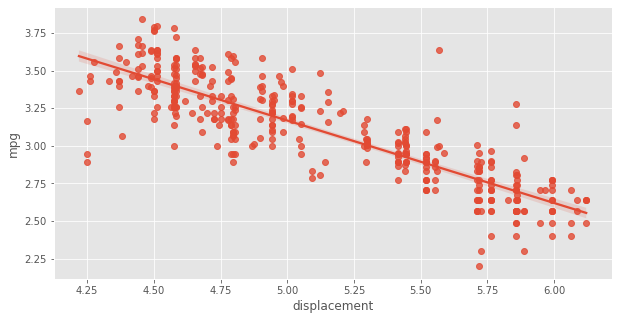

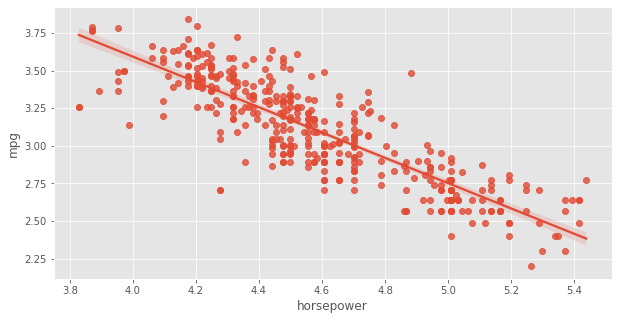

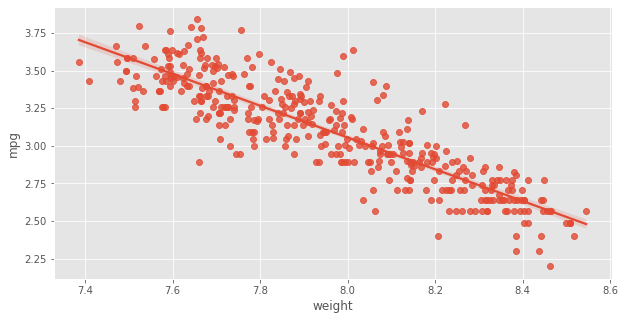

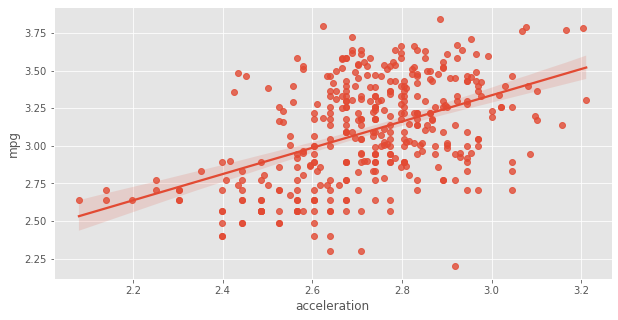

In [27]:
for x in ['displacement','horsepower','weight','acceleration']:
    sns.regplot(data=df, x=x, y='mpg', 
               )
    plt.show()

Как можно заметить для всех признаков кроме acceleration зависимости стали линейными. Для acceleration ситуация после логарифирования не стала ни лучше, ни хуже.

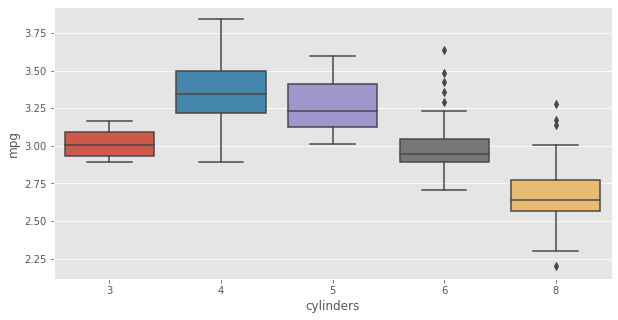

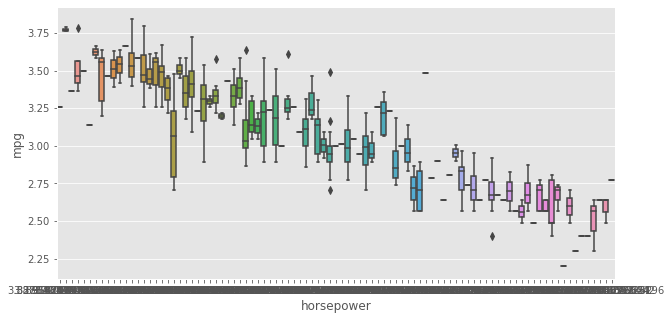

In [28]:
for x in ['cylinders', 'horsepower']:
    sns.boxplot(data=df, x=x, y='mpg');
    plt.show()

Признак cylinders является дискретным. 

Year и origin мы отбросили ввиду неоднозначности их интерпретации. 

Количество лошадиных сил будем считать непрерывным признаком, т.к. зачастую в характеристиках автомобиля это значение является дробным. В нашем случае мы получили много диаграмм "ящик с усами", что также говорит нам, что признак horsepower в нашем случае можно считать непрерывным.

In [29]:
df.shape

(392, 6)

На диаграммах "ящик с усами" можно заметить, что в нашей выборке могут присутствовать выбросы. Однако, если мы удалим все выбросы по всем признакам, то наша выборка довольно сильно "похудеет". К тому же к данным выбросам нужно относиться очень осторожно, т.к. целевая переменная зависит от нескольких признаков. В целом, размер нашей выборки позволяет убрать несколько выбросов, но пока мы этого делать не будем.

<div id= 'id_2'/>

## Регрессия

In [30]:
X = df.drop('mpg', axis = 1)
X.head(10)

,cylinders,displacement,horsepower,weight,acceleration
0,8,5.726848,4.867534,8.161660,2.484907
1,8,5.857933,5.105945,8.214194,2.442347
2,8,5.762051,5.010635,8.142063,2.397895
3,8,5.717028,5.010635,8.141190,2.484907
4,8,5.710427,4.941642,8.145840,2.351375
5,8,6.061457,5.288267,8.375860,2.302585
6,8,6.118097,5.393628,8.378850,2.197225
7,8,6.086775,5.370638,8.369157,2.140066
8,8,6.120297,5.416100,8.395026,2.302585
9,8,5.966147,5.247024,8.255828,2.140066


In [31]:
y = df['mpg']
y.head(10)

0    2.890372
1    2.708050
2    2.890372
3    2.772589
4    2.833213
5    2.708050
6    2.639057
7    2.639057
8    2.639057
9    2.708050
Name: mpg, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=20)

Отмасштабируем вещественные признаки.

In [33]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler() 
df_1 = object.fit_transform(Xtrain.iloc[:, 1:])
Xtrain.iloc[:, 1:] = df_1

df_1 = object.fit_transform(Xtest.iloc[:, 1:])
Xtest.iloc[:, 1:] = df_1

In [34]:
Xtrain.head(5)

,cylinders,displacement,horsepower,weight,acceleration
21,4,-0.833381,-0.224098,-0.562280,-0.325598
211,8,1.413129,1.206795,1.273722,-1.406918
33,6,0.575581,0.238393,0.682935,0.055474
84,8,1.413129,1.771000,1.313293,-0.949558
87,8,1.133513,1.036522,1.262208,-0.325598


In [35]:
Xtest.head(5)

,cylinders,displacement,horsepower,weight,acceleration
10,8,1.450874,1.425657,0.715147,-2.156841
291,4,-1.248788,-0.983485,-1.447552,-0.414199
115,8,1.531212,2.259722,1.357563,-2.422497
300,4,-0.942965,-1.022624,-1.059249,-0.091517
17,6,0.248996,-0.486901,-0.409287,0.277381


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

print(f'R^2_train = {round(r2_score(ytrain, pred_train), 5)}')
print(f'R^2_test = {round(r2_score(ytest, pred_test), 5)}')

R^2_train = 0.79659
R^2_test = 0.82765


In [37]:
from sklearn.metrics import mean_squared_error

print("Test RMSE = %.4f" % mean_squared_error(ytest, pred_test, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(ytrain, pred_train, squared=False))

Test RMSE = 0.1434
Train RMSE = 0.1520


In [38]:
print(f'w_0 = {lr.intercept_}')
w = lr.coef_
for i in range(len(w)):
    print(f'w_{i+1} = {w[i]}')

w_0 = 3.198122286990692
w_1 = -0.01798524329047001
w_2 = -0.04008216646525757
w_3 = -0.1793368973811117
w_4 = -0.09185450283456566
w_5 = -0.05265354106578808


<div id= 'id_3'/>

## Анализ остатков

Учитывая метрики ошибок RMSE и R^2, а также те веса, которые у нас получились, можно сделать вывод, что мы получили приемлемое качество модели. Учитывая размер выборки (392 объекта), вряд ли можно заметно улучшить качество модели. Для более высокого качества модели нужна выборка порядка 10 000 объектов, чтобы было достаточное количество для обучения регрессии и тестирования.

В нашем случае мы получили приблизительно одинаковые значения RMSE на тренировочной и тестовой выборки. Само значение RMSE приемлемо для того порядка числовых значений, которое имеет целевая переменная, что говорит в пользу нашей модели.

Коэффициент детерминации относительно близок к единице, что также говорит в пользу нашей модели. При этом на тренировочной и тестовой выборках он получился приблизительно равным, что тоже очень хорошо.

Веса получились приблизительно одного порядка, что тоже говорит о приемлемом качестве модели. При этом можно заметить, что значения весов получились отрицательными, что не противоречит здравому смыслу. Исходя из моего инженерного опыта, а также общих технических закономерностей, мне известно, что на практике, чем больше объем двигателя или крутящий момент (измеряется в лошадиных силах) или количество цилиндров у автомобиля или мототранспорта, тем меньше расход топлива. Возникает вопрос: "Почему в нашем случае получилось, что чем больше масса автомобиля, тем меньше расход топлива? Это противоречит здравому смыслу." Действительно, на первый взгляд может показаться, что чем больше масса автомобиля, тем больше энергии требуется для того, что её передвинуть, а следовательно и больше топлива. Но при этом стоит учесть, что на более тяжелые автомобили, обычно ставят более мощные системы, т.е. двигатели с большим объемом и большим крутящим моментом. Это также видно по нашей корреляционной матрице. При этом в технике есть такое понятие, как коэффициент запаса. Он применяется для проектирования абсолютно всех конструкций, и практически всегда больше 1. Т.е. если коэффициент запаса равен 1,5, то это будет говорить нам о том, что реальные характеристики двигателя в 1,5 раз выше, чем те, которые необходимы для того, чтобы сдвинуть данный автомобиль с места.

При этом, естественно, нужно сделать небольшую оговорку. Данное умозаключение о влиянии массы автомобиля на расход топлива справедливо лишь для автомобилей одной категории. Нельзя таким образом сравнивать расход топлива мотоцикла и легкового автомобиля или расход топлива грузового и легкового автомобиля. Для грузовых автомобилей порядок масс, будет сильно отличаться от легкового. В нашей же выборке, скорее всего представлены автомобили одной категории, поэтому получились вполне приемлемые результаты.

В случае если бы выборка была больших размеров, возможно у нас получилось бы уменьшить величину ошибки RMSE и приблизить её к нулю, а коэффициент детерминации к 1. В нашем же случае мы имеем дело с небольшим смещением и долей дисперсии немного большей, чем хотелось бы видеть.